**Import Pre-Processed Dataset**

In [1]:
# Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
import warnings
import pickle
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read Pre-Processed Diamonds Dataset and print its shape
diamonds = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diamond_preprocessed.csv")
diamonds

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z,is_high_quality
0,0.230000,3.0,1.000000,5.000000,31282,5.010000,61.500000,55.000000,326.000000,3.950000,3.980000,2.430000,0
1,0.210000,5.0,1.000000,4.000000,40049,1.690000,59.800000,61.000000,326.000000,3.890000,3.840000,2.310000,0
2,0.230000,2.0,1.000000,7.000000,33517,3.850000,61.800000,57.000000,327.000000,4.050000,4.070000,2.310000,0
3,0.290000,5.0,6.000000,8.000000,38495,3.490000,62.400000,58.000000,334.000000,4.200000,4.230000,2.630000,0
4,0.310000,2.0,7.000000,5.000000,34178,4.700000,63.300000,58.000000,335.000000,4.340000,4.350000,2.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100281,1.458279,3.0,1.000000,8.349129,44623,1.984516,61.233172,56.650871,2401.000000,7.285609,7.339575,4.475735,1
100282,1.029399,3.0,0.000000,4.313300,31438,3.135180,61.504731,54.253199,4839.982157,6.476995,6.464591,3.980000,1
100283,1.103770,3.0,0.506472,5.519417,35671,1.048835,62.255825,56.480583,7518.129445,6.577670,6.637541,4.113900,1
100284,1.010857,3.0,0.914336,7.000000,36784,1.595420,61.602797,56.828671,7674.830387,6.471713,6.436573,3.975997,1


In [3]:
# Selecting columns with good correlation

correlation = diamonds.corr()
selected_columns = []

for row in correlation.index:
    for col in correlation.columns:
        correlation_value = correlation.loc[row, col]
        # Do something with the correlation value
        #print(f'Correlation between {row} and {col}: {correlation_value}')
        if((correlation_value != 1) and (correlation_value >= 0.2) and (correlation_value < 0.9)):
            #print(f'Correlation between {row} and {col}: {correlation_value}')
            if(col not in selected_columns):
                selected_columns.append(col)

print(selected_columns)

['price', 'z', 'is_high_quality', 'color', 'table', 'cut', 'carat', 'x', 'y']


In [4]:
# Removing price as it is our target variable
selected_columns.remove('price')
selected_columns.remove('is_high_quality')

# Dividing the Training and Testing Data in the ratio of 80% to 20%
x,y = diamonds[selected_columns], diamonds['price']
x,y = x.sample(frac = 1, random_state = 42), y.sample(frac = 1, random_state = 42)

# Calculating 80% of data
x_train_size,y_train_size = int(x.shape[0]*0.80), int(y.shape[0]*0.80)

# Defining X_train,X_test, Y_train, Y_test
X_train,X_test = x[:x_train_size], x[x_train_size:]
Y_train,Y_test = y[:y_train_size], y[y_train_size:]

# Printing the spaes
print("Shape of X_train = {0} \nShape of X_test = {1} \nShape of Y_train = {2} \nShape of Y_test = {3}".format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))

Shape of X_train = (80228, 7) 
Shape of X_test = (20058, 7) 
Shape of Y_train = (80228,) 
Shape of Y_test = (20058,)


In [5]:
# Normalize Training Dataset for independent features

def normalization(column_name):
    min = X_train[column_name].min()
    max = X_train[column_name].max()
    X_train.loc[:,column_name] = (X_train[column_name] - min) / (max - min)

for feature in X_train.columns:
    normalization(feature)

X_train.head()

<ipython-input-5-0e79ebe5dbbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,column_name] = (X_train[column_name] - min) / (max - min)
<ipython-input-5-0e79ebe5dbbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,column_name] = (X_train[column_name] - min) / (max - min)
<ipython-input-5-0e79ebe5dbbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,z,color,table,cut,carat,x,y
58208,0.621089,0.111111,0.290598,0.428571,0.524652,0.533585,0.545983
70238,0.608413,0.098123,0.386059,0.428571,0.498641,0.528985,0.530630
63049,0.709355,0.097327,0.288478,0.428571,0.727006,0.638874,0.639034
13080,0.673913,0.777778,0.547009,1.000000,0.622093,0.584730,0.603774
3789,0.475584,0.555556,0.488597,0.285714,0.299662,0.358200,0.369071


In [6]:
# Normalize Test Dataset for independent features

def normalization(column_name):
    min = X_test[column_name].min()
    max = X_test[column_name].max()
    X_test.loc[:,column_name] = (X_test[column_name] - min) / (max - min)

for feature in X_test.columns:
    normalization(feature)

X_test.head()

<ipython-input-6-3039877947fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:,column_name] = (X_test[column_name] - min) / (max - min)
<ipython-input-6-3039877947fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:,column_name] = (X_test[column_name] - min) / (max - min)
<ipython-input-6-3039877947fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,z,color,table,cut,carat,x,y
21601,0.856132,0.666667,0.818182,1.000000,0.292398,0.761553,0.795918
95642,0.659091,0.111111,0.370012,0.428571,0.586633,0.572197,0.605763
67951,0.665737,0.010097,0.438023,0.428571,0.591706,0.572676,0.585933
67078,0.650334,0.048380,0.300570,0.428571,0.543385,0.551425,0.567266
74397,0.612763,0.000000,0.188240,0.428571,0.485105,0.504012,0.526596


In [7]:
Y_test.min()

327.0

In [8]:
# Normalize Test Dataset for target

min = Y_train.min()
max = Y_train.max()
Y_train = (Y_train - min) / (max - min)
Y_train.head()

58208    0.753748
70238    0.660930
63049    0.799215
13080    0.594267
3789     0.360626
Name: price, dtype: float64

In [9]:
# Normalize Test Dataset for target

min = Y_test.min()
max = Y_test.max()
Y_test = (Y_test - min) / (max - min)
Y_test.head()

21601    0.236866
95642    0.236866
67951    0.671809
67078    0.680910
74397    0.535278
Name: price, dtype: float64

**Linear Regression**

In [10]:
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):

        # Ensuring that X and y have appropriate data types
        X = X.astype(np.float64)
        y = y.astype(np.float64)

        # Adding column of 1 for intercept
        X = X.copy()
        X["intercept"] = 1

        #Reversing the order of columns so that intercept column is at the beginning
        X = X[X.columns[::-1]].copy()

        # Calculate the weights using OLS equation
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w.index = X.columns

    def predict(self, X):
        # Adding column of 1 for intercept
        X = X.copy()
        X["intercept"] = 1

        # Reversing the order of columns so that intercept column is at the beginning
        X = X[X.columns[::-1]].copy()

        # return predictions
        return X @ self.w

    def mean_squared_error(self, y_true, y_pred):
        N = len(y_true)
        mse = (1/N) * np.sum((y_true - y_pred)**2)
        return mse

In [11]:
# Implementing LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
y_pred = linear_regression.predict(X_test)

In [12]:
# Calculating the mean sqaured error

mse = linear_regression.mean_squared_error(Y_test, y_pred)
print("mse =", mse)

mse = 0.05108507565688351


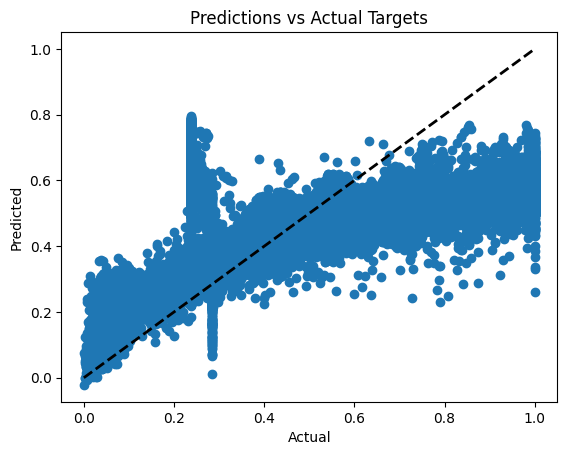

In [13]:
# Plotting the predictions vs actual targets

plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predictions vs Actual Targets')
plt.show()

**Ridge Regression**

In [14]:
class RidgeRegression:
    def __init__(self):
        self.w = None
        self.lam = 0.001

    def fit(self, X, y):

        # Ensuring that X and y have appropriate data types
        X = X.astype(np.float64)
        y = y.astype(np.float64)

         # Adding column of 1 for intercept
        X = X.copy()
        X["intercept"] = 1

        #Reversing the order of columns so that intercept column is at the beginning
        X = X[X.columns[::-1]].copy()
        I = np.identity(X.shape[1])
        I[0][0] = 0

        # Calculate the weights using OLS equation
        self.w = np.linalg.inv(X.T @ X + self.lam * I) @ X.T @ y
        self.w.index = X.columns

    def predict(self, X):
        # Adding column of 1 for intercept
        X = X.copy()
        X["intercept"] = 1

        # Reversing the order of columns so that intercept column is at the beginning
        X = X[X.columns[::-1]].copy()

        # return predictions
        return X @ self.w

    def mean_squared_error(self, y_true, y_pred):
        N = len(y_true)
        mse = (1/N) * np.sum((y_true - y_pred)**2)
        return mse

In [15]:
# Implementing Ridge Regression
ridge_regression = RidgeRegression()
ridge_regression.fit(X_train, Y_train)
y_pred = ridge_regression.predict(X_test)

In [16]:
# Calculating the MSE
mse = ridge_regression.mean_squared_error(Y_test, y_pred)
print("mse =", mse)

mse = 0.051085075197814835


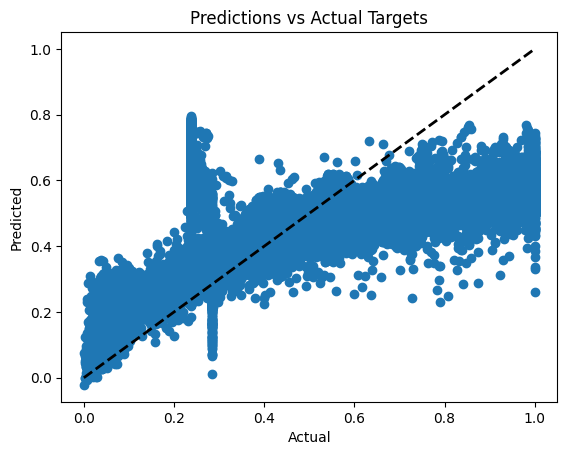

In [17]:
# Plotting the predictions vs actual targets
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predictions vs Actual Targets')
plt.show()

**Logistic Regression**

In [18]:
# Removing price as it is our target variable
selected_columns.append('price')

# Dividing the Training and Testing Data in the ratio of 80% to 20%
x,y = diamonds[selected_columns], diamonds['is_high_quality']
x,y = x.sample(frac = 1, random_state = 42), y.sample(frac = 1, random_state = 42)

# Calculating 80% of data
x_train_size,y_train_size = int(x.shape[0]*0.80), int(y.shape[0]*0.80)

# Defining X_train,X_test, Y_train, Y_test
X_train,X_test = x[:x_train_size], x[x_train_size:]
Y_train,Y_test = y[:y_train_size], y[y_train_size:]

# Printing the spaes
print("Shape of X_train = {0} \nShape of X_test = {1} \nShape of Y_train = {2} \nShape of Y_test = {3}".format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))

Shape of X_train = (80228, 8) 
Shape of X_test = (20058, 8) 
Shape of Y_train = (80228,) 
Shape of Y_test = (20058,)


In [19]:
# Normalize Training Dataset for independent features

def normalization(column_name):
    min = X_train[column_name].min()
    max = X_train[column_name].max()
    X_train.loc[:,column_name] = (X_train[column_name] - min) / (max - min)

for feature in X_train.columns:
    normalization(feature)

X_train.head()

<ipython-input-19-0e79ebe5dbbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,column_name] = (X_train[column_name] - min) / (max - min)
<ipython-input-19-0e79ebe5dbbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,column_name] = (X_train[column_name] - min) / (max - min)
<ipython-input-19-0e79ebe5dbbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,z,color,table,cut,carat,x,y,price
58208,0.621089,0.111111,0.290598,0.428571,0.524652,0.533585,0.545983,0.753748
70238,0.608413,0.098123,0.386059,0.428571,0.498641,0.528985,0.530630,0.660930
63049,0.709355,0.097327,0.288478,0.428571,0.727006,0.638874,0.639034,0.799215
13080,0.673913,0.777778,0.547009,1.000000,0.622093,0.584730,0.603774,0.594267
3789,0.475584,0.555556,0.488597,0.285714,0.299662,0.358200,0.369071,0.360626


In [20]:
# Normalize Test Dataset for independent features

def normalization(column_name):
    min = X_test[column_name].min()
    max = X_test[column_name].max()
    X_test.loc[:,column_name] = (X_test[column_name] - min) / (max - min)

for feature in X_test.columns:
    normalization(feature)

X_test.head()

<ipython-input-20-3039877947fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:,column_name] = (X_test[column_name] - min) / (max - min)
<ipython-input-20-3039877947fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:,column_name] = (X_test[column_name] - min) / (max - min)
<ipython-input-20-3039877947fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,z,color,table,cut,carat,x,y,price
21601,0.856132,0.666667,0.818182,1.000000,0.292398,0.761553,0.795918,0.236866
95642,0.659091,0.111111,0.370012,0.428571,0.586633,0.572197,0.605763,0.236866
67951,0.665737,0.010097,0.438023,0.428571,0.591706,0.572676,0.585933,0.671809
67078,0.650334,0.048380,0.300570,0.428571,0.543385,0.551425,0.567266,0.680910
74397,0.612763,0.000000,0.188240,0.428571,0.485105,0.504012,0.526596,0.535278


In [21]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, X, Y):
        h = self.sigmoid(np.dot(self.weights, X.T) + self.bias)
        loss = np.mean(-Y * np.log(h) - (1 - Y) * np.log(1- h))
        return loss

    def gradient_descent(self, weights, bias, X, Y):
        # Calling the sigmoid function to calculate y_hat or pred
        pred = self.sigmoid(np.dot(self.weights, X.T) + self.bias)

        # y_hat - y
        delta = pred - Y

        # dw = (1/N)*(y_hat - y)*X^T
        dw = np.dot(X.T, delta) / self.number_of_samples

        # db = (1/N)*(y_hat - y)
        db = np.sum(delta) / self.number_of_samples

        # Update rules
        self.weights = self.weights - (self.learning_rate) * dw
        self.bias = self.bias - (self.learning_rate) * db

    def accuracy_score(self, X, Y):
        Y_pred = self.predict(X)
        accuracy = np.mean(Y_pred == Y)
        return accuracy


    def fit(self, X, Y):
        # Extracting samples and features counts
        self.number_of_samples, self.number_of_features = X.shape

        # Initializing random weights and bias = 0
        self.weights = np.random.uniform(0, 1, self.number_of_features)
        self.bias = 0
        self.loss = []

        # Calling gradient_descent for all iterations
        for iteration in range(self.iterations):
            self.gradient_descent(self.weights, self.bias, X, Y)
            loss_values = self.cost(X,Y)
            self.loss.append(loss_values)

    def predict(self, X):
        prediction = self.sigmoid(np.dot(self.weights, X.T) + self.bias)
        prediction = np.where(prediction >= 0.5, 1, 0)
        return prediction

    def accuracy_score(self, Y_pred, Y_test):
        return np.mean(Y_pred == Y_test)

In [22]:
# Get predicted values
model = LogisticRegression(1e-3,100000)
model.fit(X_train,Y_train)
quality_prediction = model.predict(X_test)
print("prediction_values = {0}".format(quality_prediction))

prediction_values = [0 1 1 ... 1 0 1]


In [23]:
# Find the accuracy
accuracy = model.accuracy_score(quality_prediction, Y_test)
print("Accuracy Score = {0}".format(accuracy))

Accuracy Score = 0.9355369428656894


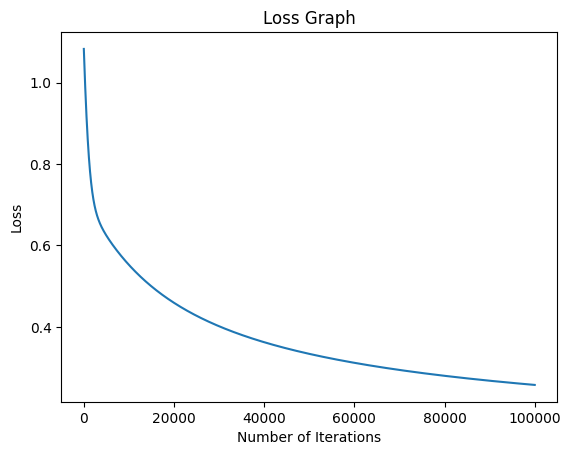

In [24]:
# Plot the loss graph
plt.plot(model.loss)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.show()

**Hyper Parameter Optimization (Setup-1)**

In [25]:
# Get predicted values
model2 = LogisticRegression(1e-2,110000)
model2.fit(X_train,Y_train)
quality_prediction2 = model2.predict(X_test)
print("prediction_values = {0}".format(quality_prediction2))

prediction_values = [0 1 1 ... 1 0 1]


In [26]:
# Find the accuracy
accuracy2 = model2.accuracy_score(quality_prediction2, Y_test)
print("Accuracy Score = {0}".format(accuracy2))

Accuracy Score = 0.9648020739854423


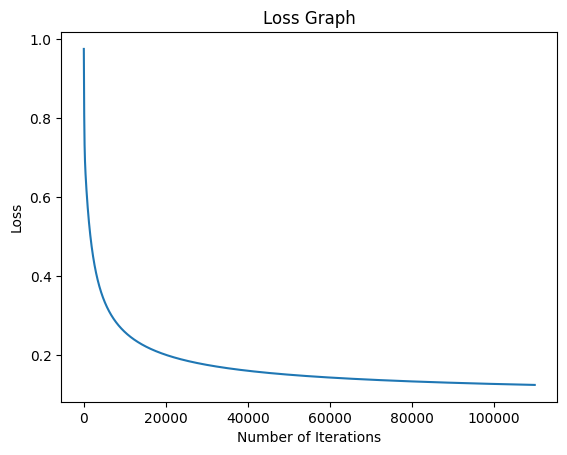

In [27]:
# Plot the loss graph
plt.plot(model2.loss)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.show()

**Hyper Parameter Optimization (Setup-2)**

In [28]:
# Get predicted values
model3 = LogisticRegression(1e-4,120000)
model3.fit(X_train,Y_train)
quality_prediction3 = model3.predict(X_test)
print("prediction_values = {0}".format(quality_prediction3))

prediction_values = [0 1 1 ... 1 0 1]


In [29]:
# Find the accuracy
accuracy3 = model3.accuracy_score(quality_prediction3, Y_test)
print("Accuracy Score = {0}".format(accuracy3))

Accuracy Score = 0.8816930900388872


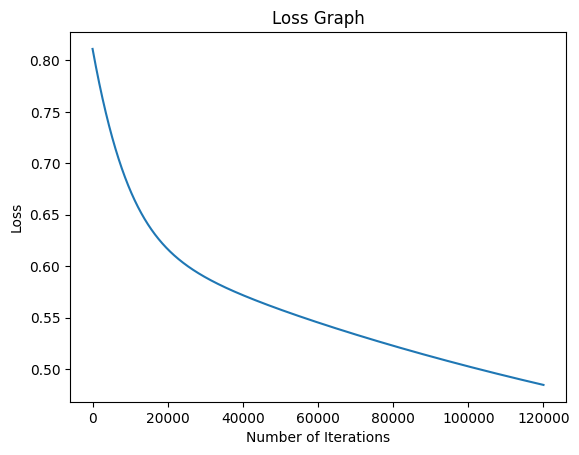

In [30]:
# Plot the loss graph
plt.plot(model3.loss)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.show()